In [52]:
import numpy as np 
import matplotlib.pyplot as plt 
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

class Actions: 
  def __init__(self, a): 
    self.action = a
    self.Qn = 0
    self.N = 0
  # reward
  def reward(self):  
    return gaussian(np.random.normal(self.action, 1, 1)[0],0,1)
  # Update 
  def update(self, x): 
    self.N += 1
    self.Qn = self.Qn+1/self.N*(x-self.Qn)

def run_experiment(a1, a2, a3, a4, a5, a6, a7 ,a8 ,a9 ,a10 ,eps, N,best_action): 
  actions = [Actions(a1), Actions(a2), Actions(a3) , Actions(a4), Actions(a5), Actions(a6), Actions(a7), Actions(a8), Actions(a9), Actions(a10)] 
  data = np.empty(N) 
  act=np.empty(N)

  for i in range(N): 
    p = np.random.random() 
    if p < eps: 
      j = np.random.choice(10) 
    else: 
      j = np.argmax([a.Qn for a in actions]) 
    x = actions[j].reward() 
    actions[j].update(x) 
  
    # for the plot 
    data[i] = x 
    act[i]=(actions[j].action)
  cumulative_best_action=np.sum(act == best_action)
  #print(cumulative_best_action)
  cumulative_act=np.cumsum(act) / (np.arange(N) + 1)
  return cumulative_best_action,cumulative_act   

In [74]:
N=1000
repeat=2000
##get ramdon actions
A=np.random.normal(0, 1, 10)
best_action=A[0]
print("\t","action" ,"\t","\tQ*(action)")
for a in A: 
  print(a ,'\t', gaussian(a,0,1))
  if gaussian(a,0,1)>gaussian(best_action,0,1):
    best_action=a
print(best_action)

	 action 	 	Q*(action)
-1.6632868303027664 	 0.25075935621140255
-1.1015853193623366 	 0.5451222988588382
-1.4720205885886015 	 0.33843531206700206
-0.9445856178933321 	 0.6401063178621635
0.890390307202549 	 0.6727392628577681
-0.09121436155683778 	 0.9958486110608391
0.24063434730783517 	 0.9714626617100937
0.3316409482801192 	 0.9464919065554036
0.571229286032379 	 0.8494625287524952
0.6427606132380028 	 0.8133688331783826
-0.09121436155683778


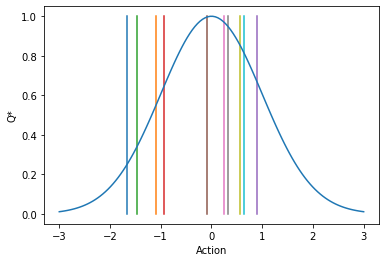

In [115]:
x_values = np.linspace(-3, 3, 120)
y_values = np.linspace(0,1,120)
for a in A: 
  x1_values= np.ones(120)*a 
  plt.plot(x1_values, y_values)

plt.plot(x_values, gaussian(x_values, 0, 1))
plt.plot()
plt.xlabel('Action')
plt.ylabel('Q*')
plt.show()

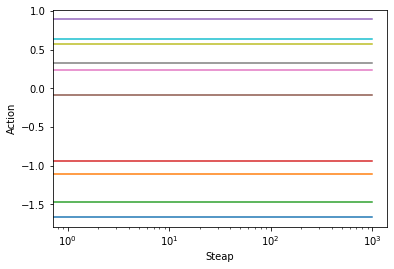

In [102]:
plt.plot(np.ones(N)*A[0]) 
plt.plot(np.ones(N)*A[1]) 
plt.plot(np.ones(N)*A[2]) 
plt.plot(np.ones(N)*A[3]) 
plt.plot(np.ones(N)*A[4]) 
plt.plot(np.ones(N)*A[5]) 
plt.plot(np.ones(N)*A[6])
plt.plot(np.ones(N)*A[7])
plt.plot(np.ones(N)*A[8])
plt.plot(np.ones(N)*A[9]) 
#plt.plot(data,'o') 
plt.xscale('log') 
plt.xlabel('Steap')
plt.ylabel('Action')
plt.show() 

347.2815


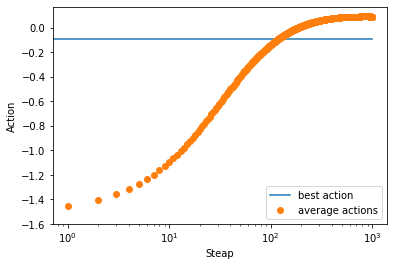

In [116]:
repeat=2000
N=1000
data=np.zeros(N)
b_a=0;
data_best=0;
#iterations
for i in range(repeat):
  b_a,c_1 = run_experiment(A[0],A[1],A[2],A[3],A[4],A[5],A[6],A[7],A[8],A[9],0.1,N,best_action) 
  data=data+c_1 
  data_best=data_best+b_a
data /=repeat
data_best /=repeat
print(data_best)
plt.plot(np.ones(N)*best_action,label="best action") 
plt.plot(data,'o',label="average actions") 
plt.xscale('log') 
plt.xlabel('Steap')
plt.ylabel('Action')
plt.legend()
plt.show() 

185.7965


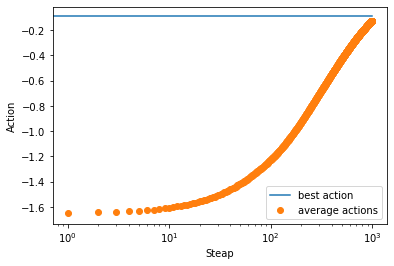

In [117]:

data=np.zeros(N)
b_a=0;
data_best=0;
#iterations
for i in range(repeat):
  b_a,c_1 = run_experiment(A[0],A[1],A[2],A[3],A[4],A[5],A[6],A[7],A[8],A[9],0.01,N,best_action) 
  data=data+c_1 
  data_best=data_best+b_a
data /=repeat
data_best /=repeat
print(data_best)
plt.plot(np.ones(N)*best_action,label="best action") 
plt.plot(data,'o',label="average actions") 
plt.xscale('log') 
plt.xlabel('Steap')
plt.ylabel('Action')
plt.legend()
plt.show() 

0.0


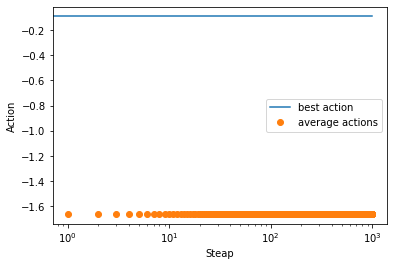

In [109]:
data=np.zeros(N)
b_a=0;
data_best=0;
#iterations
for i in range(repeat):
  b_a,c_1 = run_experiment(A[0],A[1],A[2],A[3],A[4],A[5],A[6],A[7],A[8],A[9],0.0,N,best_action) 
  data=data+c_1 
  data_best=data_best+b_a
data /=repeat
data_best /=repeat
print(data_best)
plt.plot(np.ones(N)*best_action,label="best action") 
plt.plot(data,'o',label="average actions") 
plt.xscale('log') 
plt.xlabel('Steap')
plt.ylabel('Action')
plt.legend()
plt.show() 